In [1]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
%matplotlib inline
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dfs = pd.read_csv("/content/drive/MyDrive/POL PARRA/NUCLIO/CAPSTONE/SOCIAL DEMOGRAPHIC DATASET/sociodemographic_df (1).csv", index_col = 0)

In [4]:
dfs.info()
#Observaciones :

#Hay columnas que tienen propiedades de booleanos y seria mas interesante pasarlos a numericos.
#Hay columnas que tienen propiedades de fecha y se consideran categóricas. Tendremos que convertirlas con la función 'pd.to_datetime'
#Podemos reducir el tamaño del dataset.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 8 columns):
 #   Column        Dtype  
---  ------        -----  
 0   pk_cid        int64  
 1   pk_partition  object 
 2   country_id    object 
 3   region_code   float64
 4   gender        object 
 5   age           int64  
 6   deceased      object 
 7   salary        float64
dtypes: float64(2), int64(2), object(4)
memory usage: 409.4+ MB


In [5]:
#Reducimos el tamaño del dataset
#pk_cid / age - int 32
#deceased boolean where N = 0 & S = 1
#region_code --> int8 // pasarlo a numerico

In [6]:
dfs["deceased"] = np.where(dfs["deceased"] == "S",1,0)

In [7]:
#Reducimos el tamaño del dataset
dfs["pk_cid"] = dfs["pk_cid"].astype('int32')
dfs["age"] = dfs["age"].astype('int32')
dfs["deceased"] = dfs["deceased"].astype('int8')
#dfs["region_code"] = dfs["region_code"].astype('int8')
dfs["salary"] = dfs["salary"].astype('float32')

In [8]:
#pk_partition lo pasamos a fecha

In [9]:
dfs["deceased"].value_counts() #N = vivo // S = muerto

0    5961849
1       1075
Name: deceased, dtype: int64

DATA TIME

In [10]:
dfs["pk_partition"]=pd.to_datetime(dfs["pk_partition"])

In [11]:
for col in ["pk_partition"]:
  dfs[col + "_dia"] = dfs[col].dt.day
  dfs[col + "_mes"] = dfs[col].dt.month
  dfs[col + "_año"] = dfs[col].dt.year

  del dfs[col]

dfs.head()

,pk_cid,country_id,region_code,gender,age,deceased,salary,pk_partition_dia,pk_partition_mes,pk_partition_año
0,1375586,ES,29.0,H,35,0,87218.101562,28,1,2018
1,1050611,ES,13.0,V,23,0,35548.738281,28,1,2018
2,1050612,ES,13.0,V,23,0,122179.109375,28,1,2018
3,1050613,ES,50.0,H,22,0,119775.539062,28,1,2018
4,1050614,ES,50.0,V,23,0,NaN,28,1,2018


DESCRIPCIÓN DE DATOS


In [12]:
pd.options.display.float_format = '{:.2f}'.format #Permite ver los numeros enteros y no en notadción cientifica.

In [13]:
dfs.describe()

,pk_cid,region_code,age,deceased,salary,pk_partition_dia,pk_partition_mes,pk_partition_año
count,5962924.00,5960660.00,5962924.00,5962924.00,4450821.00,5962924.00,5962924.00,5962924.00
mean,1234929.80,25.81,29.76,0.00,115816.73,28.00,5.71,2018.37
std,162302.04,13.60,11.98,0.01,199551.89,0.00,3.52,0.48
min,15891.00,1.00,2.00,0.00,1202.73,28.00,1.00,2018.00
25%,1112532.00,13.00,22.00,0.00,61500.63,28.00,3.00,2018.00
50%,1231097.00,28.00,25.00,0.00,88654.65,28.00,5.00,2018.00
75%,1352339.00,36.00,34.00,0.00,131669.91,28.00,9.00,2019.00
max,1553689.00,52.00,105.00,1.00,28894396.00,28.00,12.00,2019.00


In [14]:
#Observaciones :

# age :
''' La edad minima es 2 años
    La edad maxima es 105 años
    La media de edad es de 29.76 años
    El 75% de información se encuentra dentro de la franja 2 - 34.'''

# salary :
''' El salario minimo es 1202,73€
    El salario maximo es de 28.894.396€
    La media de salario es de 199.551,89''' #Hay que ver si hay outliers


' El salario minimo es 1202,73€\n    El salario maximo es de 28.894.396€\n    La media de salario es de 199.551,89'

In [15]:
#Observaciones de duplicados
dfs.duplicated().sum()

#No hay duplicados.

0

In [16]:
dfs.head(20)

,pk_cid,country_id,region_code,gender,age,deceased,salary,pk_partition_dia,pk_partition_mes,pk_partition_año
0,1375586,ES,29.00,H,35,0,87218.10,28,1,2018
1,1050611,ES,13.00,V,23,0,35548.74,28,1,2018
2,1050612,ES,13.00,V,23,0,122179.11,28,1,2018
3,1050613,ES,50.00,H,22,0,119775.54,28,1,2018
4,1050614,ES,50.00,V,23,0,NaN,28,1,2018
5,1050615,ES,45.00,H,23,0,22220.04,28,1,2018
6,1050616,ES,24.00,H,23,0,295590.38,28,1,2018
7,1050617,ES,50.00,H,23,0,113316.66,28,1,2018
8,1050619,ES,20.00,H,24,0,NaN,28,1,2018
9,1050620,ES,10.00,H,23,0,113194.98,28,1,2018


In [17]:
dfs.tail()

,pk_cid,country_id,region_code,gender,age,deceased,salary,pk_partition_dia,pk_partition_mes,pk_partition_año
13647304,1166765,ES,50.00,V,22,0,43912.17,28,5,2019
13647305,1166764,ES,26.00,V,23,0,23334.99,28,5,2019
13647306,1166763,ES,50.00,H,47,0,NaN,28,5,2019
13647307,1166789,ES,50.00,H,22,0,199592.81,28,5,2019
13647308,1550586,ES,28.00,H,37,0,NaN,28,5,2019


NULOS

Observación y limpieza de lso datos nulos.

In [18]:
dfs1 = dfs.copy()

In [19]:
dfs1.isnull().sum()

pk_cid                    0
country_id                0
region_code            2264
gender                   25
age                       0
deceased                  0
salary              1512103
pk_partition_dia          0
pk_partition_mes          0
pk_partition_año          0
dtype: int64

In [20]:
#Observaciones:
#Nulos en tres columnas
''' Region code, gender, salary'''

' Region code, gender, salary'

In [21]:
dfs1[dfs1["gender"].isnull()]

,pk_cid,country_id,region_code,gender,age,deceased,salary,pk_partition_dia,pk_partition_mes,pk_partition_año
1324482,476023,ES,28.00,NaN,69,0,89991.42,28,3,2018
1959576,476023,ES,28.00,NaN,69,0,89991.42,28,4,2018
3073415,476023,ES,28.00,NaN,69,0,89991.42,28,5,2018
3705152,476023,ES,28.00,NaN,69,0,89991.42,28,6,2018
3854354,476023,ES,28.00,NaN,69,0,89991.42,28,7,2018
4829286,476023,ES,28.00,NaN,69,0,89991.42,28,8,2018
5417751,216507,ES,28.00,NaN,72,0,104296.62,28,8,2018
5525093,476023,ES,28.00,NaN,69,0,89991.42,28,9,2018
5797798,216507,ES,28.00,NaN,72,0,104296.62,28,9,2018
6949550,216507,ES,28.00,NaN,72,0,104296.62,28,10,2018


In [22]:
#Entonces aplicamos la moda.
dfs1["gender"].value_counts().idxmax()

'H'

In [23]:
dfs1["gender"].fillna("H", inplace = True)

In [24]:
#Observamos que existen 25 nulos en gender.
#Los nulos pertenecen a una media de edad entorno los 70 años.
#La moda son H, por lo tanto, lo substituimos.

In [25]:
dfs1[dfs1["gender"].isnull()] #Nulos limpios.

,pk_cid,country_id,region_code,gender,age,deceased,salary,pk_partition_dia,pk_partition_mes,pk_partition_año


In [26]:
dfs2 = dfs1.copy()

In [27]:
#Pasamos a la columna RegionCode
dfs2[dfs2["region_code"].isnull()]

,pk_cid,country_id,region_code,gender,age,deceased,salary,pk_partition_dia,pk_partition_mes,pk_partition_año
2031,1050073,CA,NaN,V,53,0,NaN,28,1,2018
4139,1052929,CH,NaN,V,34,0,NaN,28,1,2018
4342,1054714,CL,NaN,V,40,0,NaN,28,1,2018
5907,1044441,IE,NaN,V,28,0,NaN,28,1,2018
15222,1058997,AT,NaN,V,43,0,NaN,28,1,2018
...,...,...,...,...,...,...,...,...,...,...
13642621,1173247,DJ,NaN,V,40,0,NaN,28,5,2019
13643189,1171742,CH,NaN,V,33,0,NaN,28,5,2019
13645938,1167439,GB,NaN,H,38,0,NaN,28,5,2019
13646171,1168237,DE,NaN,V,50,0,NaN,28,5,2019


In [28]:
#Chequeamos si todos los nulos son de personas fuera de españa

#Filtramos los datos del país con identificador "ES"
(dfs2[(dfs2["country_id"] == "ES") & (dfs2["region_code"].isnull())])

,pk_cid,country_id,region_code,gender,age,deceased,salary,pk_partition_dia,pk_partition_mes,pk_partition_año
290175,1234433,ES,NaN,V,45,0,NaN,28,1,2018
976598,1234433,ES,NaN,V,45,0,NaN,28,2,2018
1601291,1234433,ES,NaN,V,45,0,NaN,28,3,2018
2228068,1234433,ES,NaN,V,45,0,NaN,28,4,2018
2796309,1234433,ES,NaN,V,45,0,NaN,28,5,2018
3428271,1234433,ES,NaN,V,45,0,NaN,28,6,2018
4535183,1234433,ES,NaN,V,45,0,NaN,28,7,2018
5199953,1234433,ES,NaN,V,45,0,NaN,28,8,2018
5916908,1234433,ES,NaN,V,45,0,NaN,28,9,2018
6683072,1234433,ES,NaN,V,45,0,NaN,28,10,2018


In [29]:
#Observaciones:
#Hay 12 nulos que son de España (12/2264), para estos, pondremos region code 28. ya que es la moda y pertence a Madrird.
#Para el resto (2252/2264),que son fuera de España pondremos region code 00.

In [30]:
dfs2.loc[(dfs2["country_id"] == "ES") & (dfs2["region_code"].isnull()), "region_code"] = 28.0


In [31]:
dfs2["region_code"] = np.where((dfs2["country_id"] != "ES") & (dfs2["region_code"].isnull()), 0.0, dfs2["region_code"])


In [32]:
dfs2.isnull().sum()

pk_cid                    0
country_id                0
region_code               0
gender                    0
age                       0
deceased                  0
salary              1512103
pk_partition_dia          0
pk_partition_mes          0
pk_partition_año          0
dtype: int64

In [33]:
#Nulos: Salary

In [34]:
dfs3 = dfs2.copy()

In [35]:
dfs3["salary"].value_counts()

451931.22    760
288997.44    546
135522.16    466
128318.52    458
104563.80    436
            ... 
188185.69      1
37292.10       1
59427.63       1
179561.44      1
71905.29       1
Name: salary, Length: 258628, dtype: int64

In [36]:
dfs3["salary"].isnull().sum()

1512103

In [37]:
dfs3["salary"].describe()

count    4450821.00
mean      115816.73
std       199551.89
min         1202.73
25%        61500.63
50%        88654.65
75%       131669.91
max     28894396.00
Name: salary, dtype: float64

In [38]:
dfs3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 10 columns):
 #   Column            Dtype  
---  ------            -----  
 0   pk_cid            int32  
 1   country_id        object 
 2   region_code       float64
 3   gender            object 
 4   age               int32  
 5   deceased          int8   
 6   salary            float32
 7   pk_partition_dia  int64  
 8   pk_partition_mes  int64  
 9   pk_partition_año  int64  
dtypes: float32(1), float64(1), int32(2), int64(3), int8(1), object(2)
memory usage: 392.4+ MB


In [39]:
dfs3["pk_cid"].value_counts().sum()

5962924

In [40]:
# Definir los límites de edad para cada grupo
edades = [0, 18, 25, 35, 45, 55, np.inf]

# Etiquetas para cada grupo de edad
etiquetas = ['0-18', '18-25', '25-35', '35-45', '45-55', '55+']

# Crear una nueva columna 'grupo_edad' en el dataframe dfs3
dfs3['grupo_edad'] = pd.cut(dfs3['age'], bins=edades, labels=etiquetas, right=False)

# Mostrar el dataframe con la nueva columna
print(dfs3.head())

    pk_cid country_id  region_code gender  age  deceased    salary  \
0  1375586         ES        29.00      H   35         0  87218.10   
1  1050611         ES        13.00      V   23         0  35548.74   
2  1050612         ES        13.00      V   23         0 122179.11   
3  1050613         ES        50.00      H   22         0 119775.54   
4  1050614         ES        50.00      V   23         0       NaN   

   pk_partition_dia  pk_partition_mes  pk_partition_año grupo_edad  
0                28                 1              2018      35-45  
1                28                 1              2018      18-25  
2                28                 1              2018      18-25  
3                28                 1              2018      18-25  
4                28                 1              2018      18-25  


In [41]:
dfs3

,pk_cid,country_id,region_code,gender,age,deceased,salary,pk_partition_dia,pk_partition_mes,pk_partition_año,grupo_edad
0,1375586,ES,29.00,H,35,0,87218.10,28,1,2018,35-45
1,1050611,ES,13.00,V,23,0,35548.74,28,1,2018,18-25
2,1050612,ES,13.00,V,23,0,122179.11,28,1,2018,18-25
3,1050613,ES,50.00,H,22,0,119775.54,28,1,2018,18-25
4,1050614,ES,50.00,V,23,0,NaN,28,1,2018,18-25
...,...,...,...,...,...,...,...,...,...,...,...
13647304,1166765,ES,50.00,V,22,0,43912.17,28,5,2019,18-25
13647305,1166764,ES,26.00,V,23,0,23334.99,28,5,2019,18-25
13647306,1166763,ES,50.00,H,47,0,NaN,28,5,2019,45-55
13647307,1166789,ES,50.00,H,22,0,199592.81,28,5,2019,18-25


In [42]:
# Definimos los region_codes deseados. Nos quedamos con los top 5 con mas habitantes y filtramos el dataset dfs3 para mantener solo los registros correspondientes a los region_codes deseados

region_codes = [28.00, 8.00, 46.00, 30.00, 41.00]
filtered_dfs3 = dfs3[dfs3['region_code'].isin(region_codes)]

In [43]:
# Definimos 6 grupos de edad que representen correctamente la poblacion y utilizamos la función cut de pandas para asignar a cada individuo su correspondiente grupo de edad

edades = [0, 18, 25, 35, 45, 55, np.inf]
filtered_dfs3['grupo_edad'] = pd.cut(filtered_dfs3['age'], bins=edades, labels=['0-18', '18-25', '25-35', '35-45', '45-55', '55+'])


<ipython-input-43-6b034a69f612>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dfs3['grupo_edad'] = pd.cut(filtered_dfs3['age'], bins=edades, labels=['0-18', '18-25', '25-35', '35-45', '45-55', '55+'])


In [44]:
# Agrupamos los datos por region_code y grupo_edad, y calcular la media del salario para cada grupo
media_por_region_edad = filtered_dfs3.groupby(['region_code', 'grupo_edad'])['salary'].mean()

# Mostramos el resultado
print(media_por_region_edad)

region_code  grupo_edad
8.00         0-18         152086.72
             18-25        165097.30
             25-35        144283.98
             35-45        131825.48
             45-55        152783.75
             55+          170257.64
28.00        0-18         176802.06
             18-25        188884.39
             25-35        157751.44
             35-45        145551.69
             45-55        156050.62
             55+          171428.61
30.00        0-18          90330.01
             18-25         76816.17
             25-35         75256.42
             35-45         72282.02
             45-55         75702.36
             55+           79137.52
41.00        0-18         113537.60
             18-25        115587.37
             25-35        109021.59
             35-45         97162.24
             45-55        102216.51
             55+          116573.77
46.00        0-18          89282.23
             18-25         85095.70
             25-35         76586.97
    

In [47]:
mapeo_salary = {
    (8.00, '0-18', 'H'): 154816.25,
    (8.00, '0-18', 'V'): 149420.66,
    (8.00, '18-25', 'H'): 161418.66,
    (8.00, '18-25', 'V'): 169582.16,
    (8.00, '25-35', 'H'): 140977.53,
    (8.00, '25-35', 'V'): 147702.91,
    (8.00, '35-45', 'H'): 132379.45,
    (8.00, '35-45', 'V'): 131457.67,
    (8.00, '45-55', 'H'): 148240.77,
    (8.00, '45-55', 'V'): 155753.61,
    (8.00, '55+', 'H'): 175469.73,
    (8.00, '55+', 'V'): 166094.86,
    (28.00, '0-18', 'H'): 178274.67,
    (28.00, '0-18', 'V'): 175346.92,
    (28.00, '18-25', 'H'): 184936.92,
    (28.00, '18-25', 'V'): 193805.95,
    (28.00, '25-35', 'H'): 155960.95,
    (28.00, '25-35', 'V'): 159441.75,
    (28.00, '35-45', 'H'): 148763.47,
    (28.00, '35-45', 'V'): 142951.19,
    (28.00, '45-55', 'H'): 159579.53,
    (28.00, '45-55', 'V'): 152983.38,
    (28.00, '55+', 'H'): 175907.25,
    (28.00, '55+', 'V'): 166433.14,
    (30.00, '0-18', 'H'): 110016.02,
    (30.00, '0-18', 'V'): 49826.59,
    (30.00, '18-25', 'H'): 76079.88,
    (30.00, '18-25', 'V'): 77828.63,
    (30.00, '25-35', 'H'): 73451.48,
    (30.00, '25-35', 'V'): 76809.06,
    (30.00, '35-45', 'H'): 73354.16,
    (30.00, '35-45', 'V'): 71559.75,
    (30.00, '45-55', 'H'): 73886.95,
    (30.00, '45-55', 'V'): 77091.27,
    (30.00, '55+', 'H'): 75160.99,
    (30.00, '55+', 'V'): 83175.80,
    (41.00, '0-18', 'V'): 111247.79,
    (41.00, '18-25', 'H'): 113205.39,
    (41.00, '18-25', 'V'): 118655.23,
    (41.00, '25-35', 'H'): 107680.41,
    (41.00, '25-35', 'V'): 110303.29,
    (41.00, '35-45', 'H'): 99258.42,
    (41.00, '35-45', 'V'): 95789.00,
    (41.00, '45-55', 'H'): 110977.95,
    (41.00, '45-55', 'V'): 95330.38,
    (41.00, '55+', 'H'): 126960.31,
    (41.00, '55+', 'V'): 107865.14,
    (46.00, '0-18', 'H'): 91803.53,
    (46.00, '0-18', 'V'): 86843.03,
    (46.00, '18-25', 'H'): 83519.35,
    (46.00, '18-25', 'V'): 87166.61,
    (46.00, '25-35', 'H'): 75471.63,
    (46.00, '25-35', 'V'): 77545.77,
    (46.00, '35-45', 'H'): 75769.73,
    (46.00, '35-45', 'V'): 74415.53,
    (46.00, '45-55', 'H'): 79512.07,
    (46.00, '45-55', 'V'): 87649.73,
    (46.00, '55+', 'H'): 86373.87,
    (46.00, '55+', 'V'): 89555.24
}

#Definimos una función para sustituir los valores nulos de salary en dfs3 y aplicamos la función a cada fila de dfs3 para sustituir los valores nulos de salary

def sustituir_nulos(row):
    region_code = row['region_code']
    grupo_edad = row['grupo_edad']
    gender = row['gender']
    salary = row['salary']
    if pd.isnull(salary):
        return mapeo_salary.get((region_code, grupo_edad, gender), salary)
    return salary

dfs3['salary'] = dfs3.apply(sustituir_nulos, axis=1)

In [48]:
dfs3["salary"].isnull().sum()

925529

In [49]:
import pandas as pd

media_salario_grupo_edad = dfs3.groupby('grupo_edad')['salary'].mean()

print(media_salario_grupo_edad)

grupo_edad
0-18    152048.25
18-25   119336.70
25-35   113860.80
35-45   111033.96
45-55   123330.30
55+     135778.38
Name: salary, dtype: float64


In [50]:
# Calculamos media de salario por grupo de edad y sustituimos valores nulos por la media del grupo de edad correspondiente
media_salario_grupo_edad = dfs3.groupby('grupo_edad')['salary'].mean()

for index, row in dfs3.iterrows():
    if pd.isnull(row['salary']):
        grupo_edad = row['grupo_edad']
        media_grupo_edad = media_salario_grupo_edad[grupo_edad]
        dfs3.at[index, 'salary'] = media_grupo_edad

In [51]:
dfs3["salary"].isnull().sum()

0

In [52]:
dfs3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5962924 entries, 0 to 13647308
Data columns (total 11 columns):
 #   Column            Dtype   
---  ------            -----   
 0   pk_cid            int32   
 1   country_id        object  
 2   region_code       float64 
 3   gender            object  
 4   age               int32   
 5   deceased          int8    
 6   salary            float64 
 7   pk_partition_dia  int64   
 8   pk_partition_mes  int64   
 9   pk_partition_año  int64   
 10  grupo_edad        category
dtypes: category(1), float64(2), int32(2), int64(3), int8(1), object(2)
memory usage: 549.8+ MB


In [53]:
dfs4 = dfs3.copy()

In [54]:
################ Continuamos desde aqui

In [55]:
dfs_clean = dfs4.copy()

ANALISIS UNIVARIABLE

In [56]:
for i in dfs_clean:
  print(dfs_clean[i].value_counts())

1375586    17
1328781    17
1328783    17
1328784    17
1328786    17
           ..
1521045     1
1545224     1
1470941     1
1521049     1
1550586     1
Name: pk_cid, Length: 456373, dtype: int64
ES    5960672
GB        441
FR        225
DE        199
US        195
CH        194
BR         87
BE         81
VE         79
IE         68
MX         58
AT         51
AR         51
PL         49
IT         45
MA         34
CL         30
CN         28
CA         22
LU         17
ET         17
QA         17
CI         17
SA         17
CM         17
SN         17
MR         17
NO         17
RU         17
CO         17
GA         17
GT         17
DO         17
SE         16
DJ         11
PT         11
JM         11
RO          9
HU          8
DZ          7
PE          4
Name: country_id, dtype: int64
28.00    1185769
8.00      600362
46.00     358142
30.00     296856
41.00     290447
15.00     254891
29.00     187911
36.00     175850
3.00      171358
11.00     160894
33.00     134562
50.00     1

In [57]:
dfs_clean["pk_partition_dia"].value_counts()

28    5962924
Name: pk_partition_dia, dtype: int64

In [58]:
#Observaciones:
'''
  Vamos a investigar los outliers en
    - Salary
    - Age
    - Country Id
    - Region code

  '''
#Seria conveniente poner pk_cid como index?

'\n  Vamos a investigar los outliers en\n    - Salary\n    - Age\n    - Country Id\n    - Region code\n\n  '

In [59]:
#Reducimos el tamaño del dataset
dfs_clean["pk_cid"] = dfs_clean["pk_cid"].astype('int32')
dfs_clean["age"] = dfs_clean["age"].astype('int32')
dfs_clean["deceased"] = dfs_clean["deceased"].astype('int8')
dfs_clean["region_code"] = dfs_clean["region_code"].astype('int8')
dfs_clean["salary"] = dfs_clean["salary"].astype('float32')

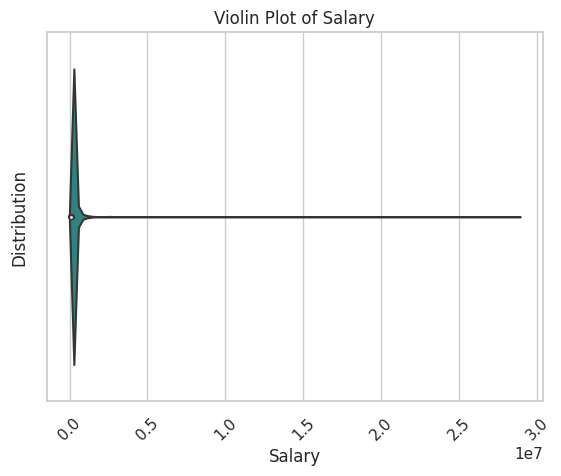

In [60]:
sns.set(style="whitegrid")  # El estilo

sns.violinplot(data=dfs_clean, x="salary", palette="viridis")
plt.xlabel("Salary")
plt.ylabel("Distribution")
plt.title("Violin Plot of Salary")

# Rotamos las x - axis para mejor lectura
plt.xticks(rotation=45)

plt.show()

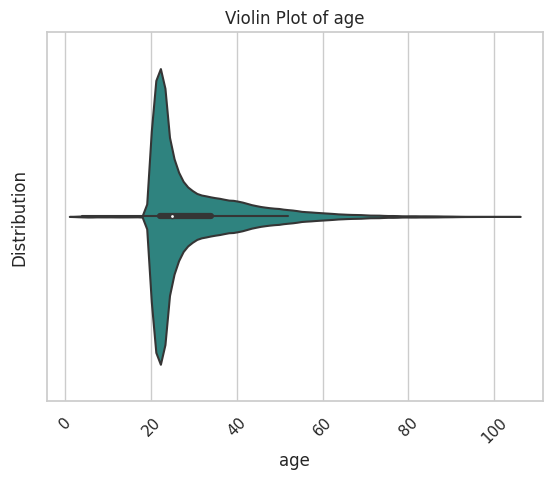

In [61]:
sns.set(style="whitegrid")  # El estilo

sns.violinplot(data=dfs_clean, x="age", palette="viridis")
plt.xlabel("age")
plt.ylabel("Distribution")
plt.title("Violin Plot of age")

# Rotamos las x - axis para mejor lectura
plt.xticks(rotation=45)

plt.show()

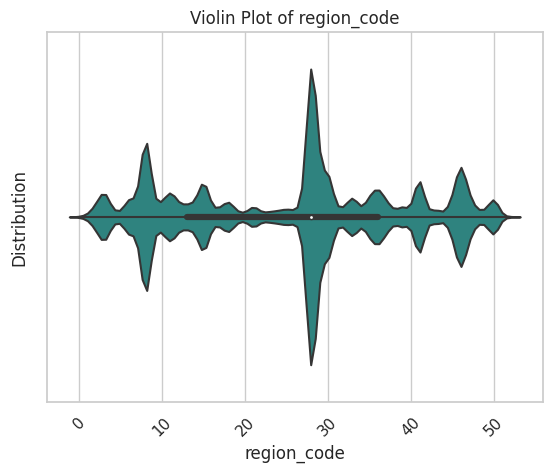

In [62]:
sns.set(style="whitegrid")  # El estilo

sns.violinplot(data=dfs_clean, x="region_code", palette="viridis")
plt.xlabel("region_code")
plt.ylabel("Distribution")
plt.title("Violin Plot of region_code")

# Rotamos las x - axis para mejor lectura
plt.xticks(rotation=45)

plt.show()

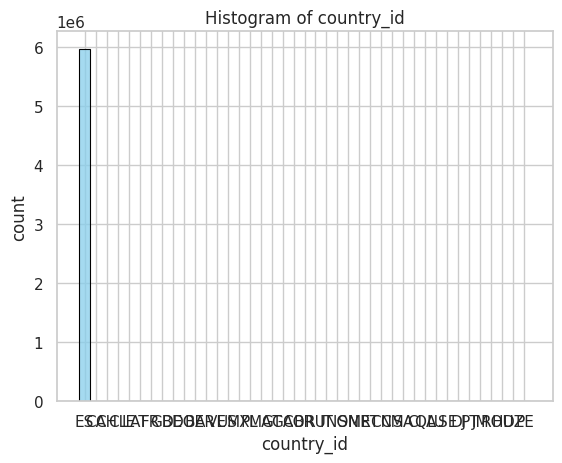

In [63]:
sns.histplot(data=dfs_clean["country_id"], color="skyblue", edgecolor="black")


# Personalizar los ejes y el título
plt.xlabel("country_id")
plt.ylabel("count")
plt.title("Histogram of country_id")

# Mostrar el gráfico
plt.show()

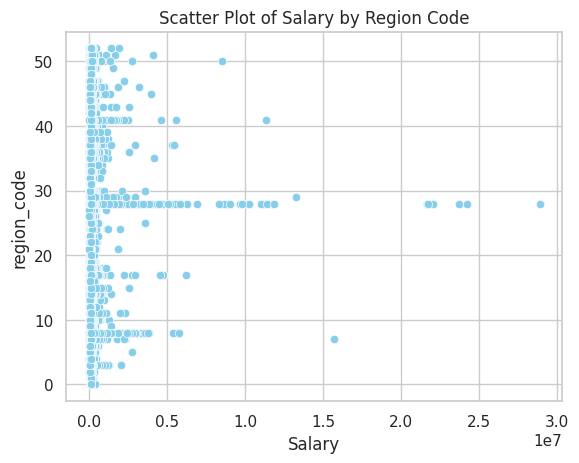

In [64]:
sns.scatterplot(data=dfs_clean, x="salary", y="region_code", color="skyblue")

# Personalizar los ejes y el título
plt.xlabel("Salary")
plt.ylabel("region_code")
plt.title("Scatter Plot of Salary by Region Code")

# Mostrar el gráfico
plt.show()

In [65]:
sns.scatterplot(data=dfs_clean, x="salary", y="age_group", color="skyblue")


# Personalizar los ejes y el título
plt.xlabel("Salary")
plt.ylabel("age_group")
plt.title("Scatter Plot of Salary by age_group")

# Mostrar el gráfico
plt.show()

ValueError: ignored

In [ ]:
dfs_clean["salary"].min()

In [ ]:

folder_path =  # Ruta de la carpeta en tu Google Drive
file_name = 'nombre_archivo.csv'  # Nombre del archivo CSV
file_path = folder_path + '/' + file_name  # Ruta completa del archivo CSV

# Guardar el DataFrame en un archivo CSV en la carpeta de Google Drive
df.to_csv(file_path, index=False)

In [ ]:
dfs_clean.duplicated().sum()

In [ ]:
dfs_clean.info()

In [ ]:
dfs_clean.to_csv(r"G:\.shortcut-targets-by-id\1bm75_bWu9x17MEqz4s0y41zSeZIOecxs\Capstone Project\EasyMoney\Datasets\csv_limpios\sociodemographic_df_clean.csv")

In [ ]:
import os
directorio = r"G:\.shortcut-targets-by-id\1bm75_bWu9x17MEqz4s0y41zSeZIOecxs\Capstone Project\EasyMoney\Datasets\pickles"
dfs_clean.to_pickle(os.path.join(directorio,"sociodemographic.pickle"))

MIRAMOS LAS DISTRIBUCIONES

A partir de listas de categoricos y numericos